# Project 3
> Submitted by: Cecelia Shao

In this project, you will perform a logistic regression on the admissions data we've been working with in projects 1 and 2.

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">
</br>

#### Performance Evaluation
---


| Requirements | Incomplete (0) | Does Not Meet Expectations (1) | Meets Expectations (2) | Exceeds Expectations (3) |
|---|---|---|---|---|
| Create dummy variables | | | |3 - good work |
| Calculate OR by hand | | | | 3|
| Complete a logistic regression using stats models and interpret your findings | | | | 3 - fantastic and clear|
| Calculate predicted probabilities | | | | 3- good work |
| Bonus: Plot predicted prob | |1- but there was an error (see code) | | |
| Bonus: Create an OR function | |2 || |

Notes:
* In order to run the code in Python 3, I added parentheses to your code, so if you re-run it now, be aware of those!
* Your code and analysis are clear and precise. I would say you are top 5 in class in your communication of your analyses.
* Your interpretation of Odds Ratios < 1 needs a little clarity - a 41% OR is not a 41% decline, but a 59% decline down from 100% to get to 41%.
* I've given you a modified Odds Ratio function that allows you to enter all four numbers for the complete calculation at once, to make things faster!
* The predicted probabilities plot was giving you an error because the predictions = combos.loc[7:] needed to be prediction = combos.iloc[:, 7] so that you assign column 7, rather than row 7.
---

## Score:
Based on the requirements, you can earn a maximum of  **12**  points on this project. 

#### Your total score is: **15**



**Rubric:**
    - Create dummy variables
    - Calculate OR by hand
    - Complete a logistic regression using stats models and interpret your findings
    - Calculate predicted probabilities

- **Bonus:** 
    - Plot the predicted probabilities
    - Brainstorm ways to improve your analysis

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np

/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [15]:
df_raw = pd.read_csv("assets/admissions.csv")
df = df_raw.dropna() 
print (df.head())

   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


## Part 1. Frequency Tables

In [16]:
# Check for the level of balance or imbalance in your target variable data - from Lesson #9
df['admit'].value_counts()

0    271
1    126
Name: admit, dtype: int64

In [17]:
# check relative %'s  - from Lesson #9
df['admit'].value_counts(normalize=True).mul(100)

0    68.261965
1    31.738035
Name: admit, dtype: float64

#### 1. Let's create a frequency table of our variables

In [18]:
# frequency table for prestige and whether or not someone was admitted

# Frequency table for just prestige 
pd.crosstab(index=df["prestige"],  # Make a crosstab
                      columns="count")      # Name the count column

# source: http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-19_17.html

col_0,count
prestige,
1.0,61
2.0,148
3.0,121
4.0,67


In [19]:
# Frequency table for just admissions
pd.crosstab(index=df["admit"],  # Make a crosstab
                      columns="count")      # Name the count column

col_0,count
admit,
0,271
1,126


In [20]:
# Table of admissions vs. prestige 
admissions_prestige = pd.crosstab(index=df["admit"], 
                           columns=df["prestige"])

admissions_prestige.columns = ["prestige1","prestige2","prestige3", "prestige4"]
admissions_prestige.index= ["yes_admit","no_admit"]

admissions_prestige 

,prestige1,prestige2,prestige3,prestige4
yes_admit,28,95,93,55
no_admit,33,53,28,12


## Part 2. Return of dummy variables


#### 2.1 Create class or dummy variables for prestige 

In [21]:
# create dummies 
prestige_dummy = pd.get_dummies(df.prestige)

#create new names for our new dummy variables
prestige_dummy.columns = ['prestige_' + str(i) for i in prestige_dummy.columns]
#join those new variables back into the larger dataset
dfmodel_data = df.join(prestige_dummy)

#to check that the dummy variables were successfully joined to the original dataset use the print function below
print (dfmodel_data.head())

   admit    gre   gpa  prestige  prestige_1.0  prestige_2.0  prestige_3.0  \
0      0  380.0  3.61       3.0             0             0             1   
1      1  660.0  3.67       3.0             0             0             1   
2      1  800.0  4.00       1.0             1             0             0   
3      1  640.0  3.19       4.0             0             0             0   
4      0  520.0  2.93       4.0             0             0             0   

   prestige_4.0  
0             0  
1             0  
2             0  
3             1  
4             1  


#### 2.2 When modeling our class variables, how many do we need? 



**Answer:**  We need k-1 dummy variables so with `gre`, `gpa`, and 4-1 dummy variables for prestige, that makes for a total of 5 variables.

## Part 3. Hand calculating odds ratios

Develop your intuition about expected outcomes by hand calculating odds ratios.

Source: http://www.statisticssolutions.com/theres-nothing-odd-about-the-odds-ratio-interpreting-binary-logistic-regression/

"In a binary logistic regression, the dependent variable is binary, meaning that the variable can only have two possible values. Because of this, when interpreting the binary logistic regression, we are no longer talking about how our independent variables predict a score, but how they predict which of the two groups of the binary dependent variable people end up falling into. To do this, we look at the odds ratio."

- continuous vs. binary predictors lead to different interpretations of the odds ratio (increase/decrease of factor of vs. multiplication of odds AND negative/positive relationship)

In [19]:
cols_to_keep = ['admit', 'gre', 'gpa']
handCalc = df[cols_to_keep].join(prestige_dummy.loc[:, 'prestige_1':])
print handCalc.head()

   admit    gre   gpa  prestige_1.0  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             0             1             0
1      1  660.0  3.67             0             0             1             0
2      1  800.0  4.00             1             0             0             0
3      1  640.0  3.19             0             0             0             1
4      0  520.0  2.93             0             0             0             1


In [20]:
# crosstab prestige 1 admission 
# frequency table cutting prestige and whether or not someone was admitted
pd.crosstab(handCalc['prestige_1.0'], handCalc['admit']) 

admit,0,1
prestige_1.0,,
0,243,93
1,28,33


#### 3.1 Use the cross tab above to calculate the odds of being admitted to grad school if you attended a #1 ranked college

In [21]:
# Source: https://stats.idre.ucla.edu/sas/faq/how-do-i-interpret-odds-ratios-in-logistic-regression/

# Interpreting prestige_1.0 = 1 as HAVING attend a #1 ranked college
# admit = 1 is BEING admitted 
# prestige 1 school and admitted  = 33 
# prestige 1 school and NO admission = 28
# admission/no admission = 33/93 

OR_yes_prestige_1= 33 / float(28)
print OR_yes_prestige_1

#odds ratio for being admitted to grad school if you attended a #1 ranked college = 1.1786

1.17857142857


#### 3.2 Now calculate the odds of admission if you did not attend a #1 ranked college

In [22]:
# Interpreting prestige_1.0 = 0 as did NOT attend a #1 ranked college
# NO prestige 1 school and admitted  = 93
# NO prestige 1 school and NO admittion = 243
# admission/no admission = 93/243

OR_no_prestige_1 = 93 / float(243)
print OR_no_prestige_1

# odds(being admitted to grad school if you did NOT attended a #1 ranked college) = 0.3827

0.382716049383


#### 3.3 Calculate the odds ratio

In [23]:
#(33 / float(28))/ float(93 / float(243))
print OR_yes_prestige_1/OR_no_prestige_1

3.07949308756


#### Bonus: Using Odds Ratio Function

In [24]:
## From Lesson #9 - more programmatic way of calculating odds ratio using the odds_ratio function
def odds_ratio(p):
    OR = p/(1-p)
    return OR

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">
### Cece, two things:

* The first part of the calculation is referred to as the "odds" of addmittance for prestige_1.0, or the "odds" of admittance for non-prestige_1.0, but when you divide those to get the ratio of the odds, that is the "odds-ratio." The terms got a bit jumbled, but only the last step is the one we're referring to when we ask for the Odds Ratio, while those first two 

* I think that you might want to go one step further in your function, to add the calculation needed to arrive at `p` into your function so that you can provide all four parameters to one function (see below for an example). Note: the paramter names are long and explicit here so that you know what I mean, but generally I would probable make them acronynms for brevity.


In [3]:
def odds_ratio(true_in_class, false_in_class, true_out_class, false_out_class):
    in_class_odds = float(true_in_class)/false_in_class
    out_class_odds = float(true_out_class)/false_out_class
    odds_ratio = in_class_odds/out_class_odds
    return odds_ratio

# Enter all the numbers into the one function:
odds_ratio(33, 28, 93,243)

3.079493087557604

In [25]:
# for being admitted to grad school if you attended a #1 ranked college
# 33 prestige 1 admitted
# 28 prestige 1 not admitted
# total is 61

33/float(61)

0.5409836065573771

In [26]:
odds_ratio(0.5409836065573771)

1.1785714285714288

In [27]:
# for being admitted to grad school if you did NOT attended a #1 ranked college
# 93 NO prestige 1 admitted
# 243 NO prestige 1 not admitted
# total is 243+93

93/float(243+93)

0.2767857142857143

In [28]:
odds_ratio(0.2767857142857143)

0.3827160493827161

#### 3.4 Write this finding in a sentence: 

Answer: If an applicant came from a #1 ranked college, his/her odds of being admitted are 3.07 times higher than the odds for an application who did NOT come from a #1 ranked college.

> an odds ratio greater than 1 implies a positive relationship

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:50px 50px 50px 0;" width="100px;">
</br> 

* Great work on hand calculations and description!

#### 3.5 Print the cross tab for prestige_4

In [29]:
pd.crosstab(handCalc['prestige_4.0'], handCalc['admit']) 

admit,0,1
prestige_4.0,,
0,216,114
1,55,12


#### 3.6 Calculate the OR 

In [30]:
OR_yes_prestige_4= 12 / float(55)
OR_no_prestige_4 = 114/ float(216)
# (12 / float(55))/ float(114 / float(216))

print OR_yes_prestige_4/OR_no_prestige_4

0.413397129187


<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">
* Good work!

In [5]:
# Double Checking with Allie's odds_ratio function
odds_ratio(12, 55, 114, 216)

0.4133971291866028

#### 3.7 Write this finding in a sentence

**Answer:** If an applicant came from a #4 ranked college, his/her odds of being admitted decline by ~41.3% compared to the odds for an application who did NOT come from a #4 ranked college.

> an odds ratio less than 1 implies a negative relationship

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">

* One important note about communicating the OR: An Odds Ratio of 1.17 (100% + 17%) is a 17% increase, but an Odds Ratio of .413 is a 58.7% (100% - 41.3%) decrease in compared with the other class.

## Part 4. Analysis

In [22]:
# create a clean data frame for the regression
cols_to_keep = ['admit', 'gre', 'gpa']
data = df[cols_to_keep].join(prestige_dummy.loc[:, 'prestige_2':])
print (data.head())

   admit    gre   gpa  prestige_2.0  prestige_3.0  prestige_4.0
0      0  380.0  3.61             0             1             0
1      1  660.0  3.67             0             1             0
2      1  800.0  4.00             0             0             0
3      1  640.0  3.19             0             0             1
4      0  520.0  2.93             0             0             1


We're going to add a constant term for our Logistic Regression. The statsmodels function we're going to be using requires that intercepts/constants are specified explicitly.

In [23]:
import statsmodels.api as sm

In [24]:
# manually add the intercept
# can also use this method: X = sm.add_constant(X)
data['intercept'] = 1.0

#### 4.1 Set the covariates to a variable called train_cols

In [25]:
train_cols = data.columns[1:]
# Index([gre, gpa, prestige_2, prestige_3, prestige_4], dtype=object)

In [48]:
train_cols

Index(['gre', 'gpa', 'prestige_2.0', 'prestige_3.0', 'prestige_4.0',
       'intercept'],
      dtype='object')

#### 4.2 Fit the model

In [26]:
# Source: https://towardsdatascience.com/building-a-logistic-regression-in-python-step-by-step-becd4d56c9c8
# logit_model=sm.Logit(y,X) where y = target and x = predictor variables
logit = sm.Logit(data['admit'], data[train_cols])

#### 4.3 Print the summary results

In [27]:
result=logit.fit()
print(result.summary())

# Note: all p-values for the coefficients are statistically significant (given 95% CI interval)

Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Fri, 09 Mar 2018   Pseudo R-squ.:                 0.08166
Time:                        13:34:30   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
gre              0.0022      0.001      2.028      0.043    7.44e-05       0.004
gpa              0.7793

#### 4.4 Calculate the odds ratios of the coeffiencents and their 95% CI intervals

hint 1: np.exp(X)

hint 2: conf['OR'] = params
        
           conf.columns = ['2.5%', '97.5%', 'OR']

In [37]:
# Source: https://stackoverflow.com/questions/39626401/how-to-get-odds-ratios-and-other-related-features-with-scikit-learn
# odds ratio = the exponent of the coefficients
# You can convert those coefficients into odds ratios using np.exp() - see lesson 9
print np.exp(result.params)

gre             1.002221
gpa             2.180027
prestige_2.0    0.506548
prestige_3.0    0.262192
prestige_4.0    0.211525
intercept       0.020716
dtype: float64


In [38]:
#95% CI intervals
print result.conf_int()

                     0         1
gre           0.000074  0.004362
gpa           0.127619  1.431056
prestige_2.0 -1.301337 -0.058936
prestige_3.0 -2.014579 -0.662776
prestige_4.0 -2.371624 -0.735197
intercept    -6.116077 -1.637631


In [39]:
# tip from James L. to make it cleaner
conf = result.conf_int()
conf['OR'] = result.params
conf.columns = ['2.5%', '97.5%', 'OR']
np.exp(conf)

,2.5%,97.5%,OR
gre,1.000074,1.004372,1.002221
gpa,1.136120,4.183113,2.180027
prestige_2.0,0.272168,0.942767,0.506548
prestige_3.0,0.133377,0.515419,0.262192
prestige_4.0,0.093329,0.479411,0.211525
intercept,0.002207,0.194440,0.020716


<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">

* Perfect!


#### 4.5 Interpret the OR of Prestige_2

**Answer:** If an applicant came from a #2 ranked college, his/her odds of being admitted decline by ~50.65% compared to the odds for an application who did NOT come from a #2 ranked college.

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">

* Same idea as above, when the OR is less than 1, such as 50.65, the odds of being admitted are 50.65% of the other class's odds, which is a decline of 100-50.65 = %49.35 decline. Otherwise, you've got this material down pat.

#### 4.6 Interpret the OR of GPA

**Answer:** A one unit increase in GPA results in an increase in likelihood of admissions by a factor of ~2.18. 

> Source: http://www.statisticssolutions.com/theres-nothing-odd-about-the-odds-ratio-interpreting-binary-logistic-regression/

## Part 5: Predicted probablities


As a way of evaluating our classifier, we're going to recreate the dataset with every logical combination of input values. This will allow us to see how the predicted probability of admission increases/decreases across different variables. First we're going to generate the combinations using a helper function called cartesian (above).

We're going to use np.linspace to create a range of values for "gre" and "gpa". This creates a range of linearly spaced values from a specified min and maximum value--in our case just the min/max observed values.

#### From James L.

`instead of generating all possible values of GRE and GPA, we're going to use an evenly spaced range of 10 values) from the min to the max` leads to…

```[ 220. 284.44444444 348.88888889 413.33333333 477.77777778
542.22222222 606.66666667 671.11111111 735.55555556 800. ]
```
Each GRE bin is about 64.444444 apart from the next one.


```[ 2.26 2.45333333 2.64666667 2.84 3.03333333 3.22666667
3.42 3.61333333 3.80666667 4. ]
```
Each GPA bin is about 0.19333333 apart from the next one. 
So with using linspace you’ll create permutations along an evenly spaced range of ten values and the `combos` df should have a shape of about (400,4). If you passed on using linspace and instead used all 26 unique values for GRE and all 132 unique values for GPA, your combos df would blow up to something along the (640000, 4)

In [35]:
# linspace narrows down the patterns from the linearly spaced values permutations populated by linspace

def cartesian(arrays, out=None):
    """
    Generate a cartesian product of input arrays.
    Parameters
    ----------
    arrays : list of array-like
        1-D arrays to form the cartesian product of.
    out : ndarray
        Array to place the cartesian product in.
    Returns
    -------
    out : ndarray
        2-D array of shape (M, len(arrays)) containing cartesian products
        formed of input arrays.
    Examples
    --------
    >>> cartesian(([1, 2, 3], [4, 5], [6, 7]))
    array([[1, 4, 6],
           [1, 4, 7],
           [1, 5, 6],
           [1, 5, 7],
           [2, 4, 6],
           [2, 4, 7],
           [2, 5, 6],
           [2, 5, 7],
           [3, 4, 6],
           [3, 4, 7],
           [3, 5, 6],
           [3, 5, 7]])
    """

    arrays = [np.asarray(x) for x in arrays]
    dtype = arrays[0].dtype

    n = np.prod([x.size for x in arrays])
    if out is None:
        out = np.zeros([n, len(arrays)], dtype=dtype)

    m = int(n / arrays[0].size)
    out[:,0] = np.repeat(arrays[0], m)
    if arrays[1:]:
        cartesian(arrays[1:], out=out[0:m,1:])
        for j in range(1, arrays[0].size):
            out[j*m:(j+1)*m,1:] = out[0:m,1:]
    return out

In [36]:
# instead of generating all possible values of GRE and GPA, we're going
# to use an evenly spaced range of 10 values from the min to the max 
gres = np.linspace(data['gre'].min(), data['gre'].max(), 10)
#print gres
# array([ 220.        ,  284.44444444,  348.88888889,  413.33333333,
#         477.77777778,  542.22222222,  606.66666667,  671.11111111,
#         735.55555556,  800.        ])
gpas = np.linspace(data['gpa'].min(), data['gpa'].max(), 10)
#print gpas
# array([ 2.26      ,  2.45333333,  2.64666667,  2.84      ,  3.03333333,
#         3.22666667,  3.42      ,  3.61333333,  3.80666667,  4.        ])


# enumerate all possibilities
combos = pd.DataFrame(cartesian([gres, gpas, [1, 2, 3, 4], [1.]]))

#### 5.1 Recreate the dummy variables

In [37]:
combos.columns = ['gre', 'gpa', 'prestige', 'intercept']
# recreate the dummy variables
prestige_dummy = pd.get_dummies(combos['prestige'])

#create new names for our new dummy variables
prestige_dummy.columns = ['prestige_' + str(i) for i in prestige_dummy.columns]
#join those new variables back into the larger dataset
combosmodel_data = combos.join(prestige_dummy)

combosmodel_data.head()

,gre,gpa,prestige,intercept,prestige_1.0,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,1,0,0,0
1,220.0,2.260000,2.0,1.0,0,1,0,0
2,220.0,2.260000,3.0,1.0,0,0,1,0
3,220.0,2.260000,4.0,1.0,0,0,0,1
4,220.0,2.453333,1.0,1.0,1,0,0,0


In [38]:
# keep only what we need for making predictions
cols_to_keep = ['gre', 'gpa', 'prestige', 'intercept']
combos = combos[cols_to_keep].join(prestige_dummy.loc[:, 'prestige_2.0':])

combos.head()

,gre,gpa,prestige,intercept,prestige_2.0,prestige_3.0,prestige_4.0
0,220.0,2.260000,1.0,1.0,0,0,0
1,220.0,2.260000,2.0,1.0,1,0,0
2,220.0,2.260000,3.0,1.0,0,1,0
3,220.0,2.260000,4.0,1.0,0,0,1
4,220.0,2.453333,1.0,1.0,0,0,0


#### 5.2 Make predictions on the enumerated dataset

In [42]:
combos['admit_pred'] = result.predict(combos[train_cols])
# The predictions array needed to be modified from combos.loc[7:] to what I have below:
predictions = combos.iloc[:,7]
print( combos.tail(4))

       gre  gpa  prestige  intercept  prestige_2.0  prestige_3.0  \
396  800.0  4.0       1.0        1.0             0             0   
397  800.0  4.0       2.0        1.0             1             0   
398  800.0  4.0       3.0        1.0             0             1   
399  800.0  4.0       4.0        1.0             0             0   

     prestige_4.0  admit_pred  
396             0    0.734040  
397             0    0.582995  
398             0    0.419833  
399             1    0.368608  


#### 5.3 Interpret findings for the last 4 observations

**Answer:** The admit_pred column describes the probabilities for admission for the applicants of those profiles (generated by linspace above in the beginning of Part 5). It's clear that for applicants with "better" prestige (aka Prestige 1 schools) have a much higher change of being admitted to graduate school than applicants with lower prestige schools (Prestige 3 and 4). 

For row/"applicant" 396, the resulting prediction was `0.734040` which translates to a 73% probability that an applicant of this profile (coming from a Prestige 1 school) would be admitted. Compare this to row/"applicant" 399, which received a `0.368608` admit_pred value, which means that an applicant with the same academic credentials but from a different level of prestige (Prestige 4 school)only has a ~37% probabibility of being admitted.

Because gre and gpa scores were held constant (at a perfect 800 gre score and 4.0 gpa), the difference in probabilities for admission just on the basis on different prestige levels suggests that there is an association between better prestige and higher changes of admissions.

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">

* WELL DONE! Cece, you communicate technical details very well!

## Bonus

Plot the probability of being admitted into graduate school, stratified by GPA and GRE score.

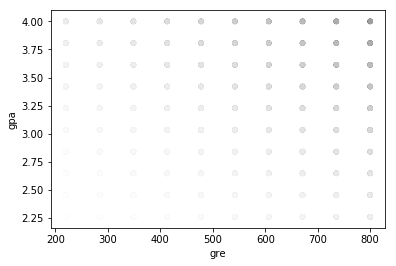

In [43]:
combos.plot('gre', 'gpa', kind='scatter', c=predictions)

<img src="https://i.imgur.com/uXQyEHK.png" style="float: left; margin:0 50px 50px 0;" width="100px;">

* The plot was not working because the predictions assignment was to row 7 of the dataframe, rather than to column 7. Now it works, but Gilder had a great plot function, so I'll borrow it from him to show you another way to plot.

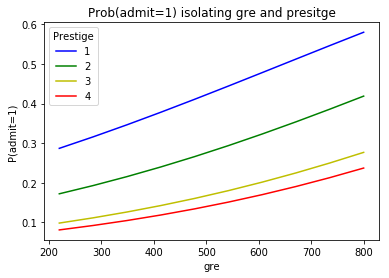

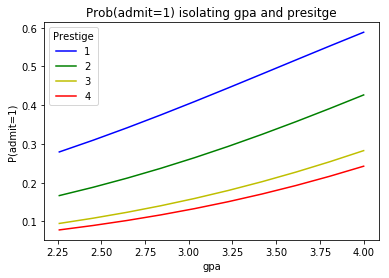

In [47]:
def isolate_and_plot(variable):
      # isolate gre and class rank
      grouped = pd.pivot_table(combos, values=['admit_pred'], index=[variable, 'prestige'],
                  aggfunc=np.mean)
      # make a plot
      colors = 'rbgyrbgy'
      for col in combos.prestige.unique():
          plt_data = grouped.iloc[grouped.index.get_level_values(1)==col]
          pl.plot(plt_data.index.get_level_values(0), plt_data['admit_pred'], color=colors[int(col)])

      pl.xlabel(variable)
      pl.ylabel("P(admit=1)")
      pl.legend(['1', '2', '3', '4'], loc='upper left', title='Prestige')
      pl.title("Prob(admit=1) isolating " + variable + " and presitge")
      pl.show()

isolate_and_plot('gre')
isolate_and_plot('gpa')